In [1]:
import numpy as np
import pandas as pd

In [2]:
loan_data_inputs_train = pd.read_csv('loan_data_inputs_train.csv', index_col=0)
loan_data_targets_train = pd.read_csv('loan_data_targets_train.csv', index_col=0)
loan_data_inputs_test = pd.read_csv('loan_data_inputs_test.csv', index_col=0)
loan_data_targets_test = pd.read_csv('loan_data_targets_test.csv', index_col=0)
loan_data_targets_train.head()

,good_bad
8321,1
21102,1
23008,1
15102,1
12607,1


In [3]:
loan_data_inputs_train.shape, loan_data_targets_train.shape, loan_data_inputs_test.shape, loan_data_targets_test.shape

((31773, 256), (31773, 1), (7944, 256), (7944, 1))

In [4]:
inputs_train_with_ref_cat = loan_data_inputs_train.loc[:, ['grade: A',
'grade: B',
'grade: C',
'grade: D',
'grade: E',
'grade: F',
'grade: G',
'home_ownership: RENT',
'home_ownership: OWN',
'home_ownership: MORTGAGE_OTHER_NONE',
'addr_state: NE_NV_SD',
'addr_state: FL_MO',
'addr_state: MS_ID_NM_HI',
'addr_state: NH_WA_UT_MD_AK',
'addr_state: GA_OR',
'addr_state: NJ_AZ',
'addr_state: MI_NC',
'addr_state: SC_KY',
'addr_state: RI_CT_IL_OH_WI_MT',
'addr_state: OK_VA_MA',
'addr_state: MN_LA_PA',
'addr_state: CO_AL_KS',
'addr_state: VT_AR_WV_DE',
'addr_state: TN_DC_WY_IA_ME_IN',
'verification_status: Verified',
'verification_status: Source Verified',
'verification_status: Not Verified',
'purpose: small_business',
'purpose: renewable_energy_educational_house',
'purpose: other',
'purpose: medical_moving',
'purpose: debt_consolidation',
'purpose: vacation',
'purpose: home_improvement',
'purpose: credit_card',
'purpose: major_purchase_car_wedding',
'term: 36',
'term: 60',
'emp_length: 0',
'emp_length: 1',
'emp_length: 2-3',
'emp_length: 4-6',
'emp_length: 7',
'emp_length: 8',
'emp_length: 9',
'emp_length: 10',
'mths_since_issue_date: <86',
'mths_since_issue_date: 87-89',
'mths_since_issue_date: 90-92',
'mths_since_issue_date: 93-97',
'mths_since_issue_date: 98-102',
'mths_since_issue_date: 103-108',
'mths_since_issue_date: 109-111',
'mths_since_issue_date: 111-119',
'mths_since_issue_date: >119',
'annual_inc: <18K',
'annual_inc: 18K-30K',
'annual_inc: 30K-40K',
'annual_inc: 40K-50K',
'annual_inc: 50K-60K',
'annual_inc: 60K-70K',
'annual_inc: 70K-80K',
'annual_inc: 80K-90K',
'annual_inc: 90K-100K',
'annual_inc: 100K-120K',
'annual_inc: >120K',
'installment: <100',
'installment: 100-200',
'installment: 200-300',
'installment: 300-400',
'installment: 400-500',
'installment: 500-600',
'installment: 600-700',
'installment: >700',
'dti: <5',
'dti: 5-10',
'dti: 10-15',
'dti: 15-20',
'dti: 20-25',
'dti: >25',
'inq_last_6mths: 0',
'inq_last_6mths: 1',
'inq_last_6mths: 2',
'inq_last_6mths: 3',
'inq_last_6mths: >4',
'mths_since_last_delinq: <15',
'mths_since_last_delinq: 16-43',
'mths_since_last_delinq: 44-67',
'mths_since_last_delinq: >68',
'mths_since_last_delinq: Missing',
'int_rate: <0.0619',
'int_rate: 0.0619-0.0849',
'int_rate: 0.0849-0.112',
'int_rate: 0.112-0.15',
'int_rate: 0.15-0.188',
'int_rate: >0.188',
'mths_since_earliest_cr_line: <159',
'mths_since_earliest_cr_line: 159-178',
'mths_since_earliest_cr_line: 178-197',
'mths_since_earliest_cr_line: 197-311',
'mths_since_earliest_cr_line: 311-388',
'mths_since_earliest_cr_line: >388'
]]

In [5]:
ref_categories = ['grade: G',
'home_ownership: RENT',
'addr_state: NE_NV_SD',
'verification_status: Verified',
'purpose: small_business',
'term: 60',
'emp_length: 0',
'mths_since_issue_date: <86',
'annual_inc: <18K',
'installment: >700',
'dti: >25',
'inq_last_6mths: >4',
'mths_since_last_delinq: <15',
'int_rate: >0.188',
'mths_since_earliest_cr_line: <159',
]

In [6]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis=1)
inputs_train.head()

,grade: A,grade: B,grade: C,grade: D,grade: E,grade: F,home_ownership: OWN,home_ownership: MORTGAGE_OTHER_NONE,addr_state: FL_MO,addr_state: MS_ID_NM_HI,...,int_rate: <0.0619,int_rate: 0.0619-0.0849,int_rate: 0.0849-0.112,int_rate: 0.112-0.15,int_rate: 0.15-0.188,mths_since_earliest_cr_line: 159-178,mths_since_earliest_cr_line: 178-197,mths_since_earliest_cr_line: 197-311,mths_since_earliest_cr_line: 311-388,mths_since_earliest_cr_line: >388
8321,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
21102,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
23008,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
15102,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
12607,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [8]:
reg = LogisticRegression()
pd.options.display.max_rows = None
reg.fit(inputs_train, loan_data_targets_train)

C:\Users\gk514\anaconda3\envs\minimal_ds\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [9]:
reg.intercept_

array([-1.42020301])

In [10]:
reg.coef_

array([[ 0.85793034,  0.55183797,  0.39457477,  0.14575283,  0.12557414,
         0.02340081,  0.02964781, -0.04996548, -0.13537939, -0.03108209,
        -0.0313394 ,  0.00241814,  0.03008687,  0.20596203,  0.1866879 ,
         0.23550885,  0.1673369 ,  0.24147207,  0.35769663,  0.52223438,
         1.0079633 , -0.012641  , -0.01147098,  0.3893376 ,  0.51521315,
         0.50121109,  0.69201858,  0.5187409 ,  0.76089756,  0.8909668 ,
         0.94568062,  0.48250285,  0.08218641,  0.15209475,  0.10608885,
         0.03798132,  0.09631163,  0.18636415, -0.02347998,  0.1125673 ,
         0.08679717,  0.17392393,  0.19211152,  0.24010286,  0.05958137,
         0.23095511, -0.15363248,  0.23472461,  0.37282019,  0.57830254,
         0.5901517 ,  0.77514402,  0.91668055,  0.99370966,  1.09009792,
         1.2699317 ,  1.2781186 ,  0.05694267,  0.12842601,  0.15520764,
         0.1366276 ,  0.09495076,  0.18162598,  0.09791664,  0.02737862,
         0.04839811, -0.06165694, -0.0655105 , -0.0

In [11]:
feature_name = inputs_train.columns.values
summary_table = pd.DataFrame(columns=['Features Name'], data=feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table.head()

,Features Name,Coefficients
0,Intercept,-1.420203
1,grade: A,0.857930
2,grade: B,0.551838
3,grade: C,0.394575
4,grade: D,0.145753


In [12]:
from sklearn import linear_model
import numpy as np
import scipy.stats as stat

class LogisticRegression_with_p_values:
    """
    Wrapper Class for Logistic Regression which has the usual sklearn instance 
    in an attribute self.model, and pvalues, z scores and estimated 
    errors for each coefficient in 
    
    self.z_scores
    self.p_values
    self.sigma_estimates
    
    as well as the negative hessian of the log Likelihood (Fisher information)
    
    self.F_ij
    """
    
    def __init__(self,*args,**kwargs):#,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)#,**args)

    def fit(self,X,y):
        self.model.fit(X,y)
        #### Get p-values for the fitted model ####
        denom = (2.0*(1.0+np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X/denom).T,X) ## Fisher Information Matrix
        Cramer_Rao = np.linalg.inv(F_ij) ## Inverse Information Matrix
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0]/sigma_estimates # z-score for eaach model coefficient
        p_values = [stat.norm.sf(abs(x))*2 for x in z_scores] ### two tailed test for p-values
        
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.z_scores = z_scores
        self.p_values = p_values
        self.sigma_estimates = sigma_estimates
        self.F_ij = F_ij

In [13]:
reg2 = LogisticRegression_with_p_values()
reg2.fit(inputs_train, loan_data_targets_train)

C:\Users\gk514\anaconda3\envs\minimal_ds\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [14]:
feature_name = inputs_train.columns.values
summary_table = pd.DataFrame(columns=['Features Name'], data=feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table.head()

,Features Name,Coefficients
0,Intercept,-1.420203
1,grade: A,0.857930
2,grade: B,0.551838
3,grade: C,0.394575
4,grade: D,0.145753


In [15]:
p_values = reg2.p_values
p_values = np.append(np.nan, np.array(p_values))
summary_table['p-value'] = p_values
summary_table

,Features Name,Coefficients,p-value
0,Intercept,-1.420203,NaN
1,grade: A,0.857930,1.462505e-04
2,grade: B,0.551838,2.761798e-03
3,grade: C,0.394575,2.518106e-02
4,grade: D,0.145753,3.700556e-01
5,grade: E,0.125574,4.014070e-01
6,grade: F,0.023401,8.734245e-01
7,home_ownership: OWN,0.029648,6.502303e-01
8,home_ownership: MORTGAGE_OTHER_NONE,-0.049965,2.102216e-01
9,addr_state: FL_MO,-0.135379,2.158052e-02


In [16]:
inputs_train_with_ref_cat = loan_data_inputs_train.loc[:, ['grade: A',
'grade: B',
'grade: C',
'grade: D',
'grade: E',
'grade: F',
'grade: G',
'addr_state: NE_NV_SD',
'addr_state: FL_MO',
'addr_state: MS_ID_NM_HI',
'addr_state: NH_WA_UT_MD_AK',
'addr_state: GA_OR',
'addr_state: NJ_AZ',
'addr_state: MI_NC',
'addr_state: SC_KY',
'addr_state: RI_CT_IL_OH_WI_MT',
'addr_state: OK_VA_MA',
'addr_state: MN_LA_PA',
'addr_state: CO_AL_KS',
'addr_state: VT_AR_WV_DE',
'addr_state: TN_DC_WY_IA_ME_IN',
'purpose: small_business',
'purpose: renewable_energy_educational_house',
'purpose: other',
'purpose: medical_moving',
'purpose: debt_consolidation',
'purpose: vacation',
'purpose: home_improvement',
'purpose: credit_card',
'purpose: major_purchase_car_wedding',
'term: 36',
'term: 60',
'emp_length: 0',
'emp_length: 1',
'emp_length: 2-3',
'emp_length: 4-6',
'emp_length: 7',
'emp_length: 8',
'emp_length: 9',
'emp_length: 10',
'mths_since_issue_date: <86',
'mths_since_issue_date: 87-89',
'mths_since_issue_date: 90-92',
'mths_since_issue_date: 93-97',
'mths_since_issue_date: 98-102',
'mths_since_issue_date: 103-108',
'mths_since_issue_date: 109-111',
'mths_since_issue_date: 111-119',
'mths_since_issue_date: >119',
'annual_inc: <18K',
'annual_inc: 18K-30K',
'annual_inc: 30K-40K',
'annual_inc: 40K-50K',
'annual_inc: 50K-60K',
'annual_inc: 60K-70K',
'annual_inc: 70K-80K',
'annual_inc: 80K-90K',
'annual_inc: 90K-100K',
'annual_inc: 100K-120K',
'annual_inc: >120K',
'installment: <100',
'installment: 100-200',
'installment: 200-300',
'installment: 300-400',
'installment: 400-500',
'installment: 500-600',
'installment: 600-700',
'installment: >700',
'inq_last_6mths: 0',
'inq_last_6mths: 1',
'inq_last_6mths: 2',
'inq_last_6mths: 3',
'inq_last_6mths: >4',
'mths_since_last_delinq: <15',
'mths_since_last_delinq: 16-43',
'mths_since_last_delinq: 44-67',
'mths_since_last_delinq: >68',
'mths_since_last_delinq: Missing',
'int_rate: <0.0619',
'int_rate: 0.0619-0.0849',
'int_rate: 0.0849-0.112',
'int_rate: 0.112-0.15',
'int_rate: 0.15-0.188',
'int_rate: >0.188',
'mths_since_earliest_cr_line: <159',
'mths_since_earliest_cr_line: 159-178',
'mths_since_earliest_cr_line: 178-197',
'mths_since_earliest_cr_line: 197-311',
'mths_since_earliest_cr_line: 311-388',
'mths_since_earliest_cr_line: >388'
]]

In [17]:
ref_categories = ['grade: G',
'addr_state: NE_NV_SD',
'purpose: small_business',
'term: 60',
'emp_length: 0',
'mths_since_issue_date: <86',
'annual_inc: <18K',
'installment: >700',
'inq_last_6mths: >4',
'mths_since_last_delinq: <15',
'int_rate: >0.188',
'mths_since_earliest_cr_line: <159',
]

In [18]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis=1)
inputs_train.head()

,grade: A,grade: B,grade: C,grade: D,grade: E,grade: F,addr_state: FL_MO,addr_state: MS_ID_NM_HI,addr_state: NH_WA_UT_MD_AK,addr_state: GA_OR,...,int_rate: <0.0619,int_rate: 0.0619-0.0849,int_rate: 0.0849-0.112,int_rate: 0.112-0.15,int_rate: 0.15-0.188,mths_since_earliest_cr_line: 159-178,mths_since_earliest_cr_line: 178-197,mths_since_earliest_cr_line: 197-311,mths_since_earliest_cr_line: 311-388,mths_since_earliest_cr_line: >388
8321,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
21102,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
23008,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
15102,0,1,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
12607,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [19]:
reg2 = LogisticRegression_with_p_values()
reg2.fit(inputs_train, loan_data_targets_train)

C:\Users\gk514\anaconda3\envs\minimal_ds\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:
feature_name = inputs_train.columns.values
summary_table = pd.DataFrame(columns=['Features Name'], data=feature_name)
summary_table['Coefficients'] = np.transpose(reg2.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg2.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table.head()

,Features Name,Coefficients
0,Intercept,-1.405381
1,grade: A,0.867081
2,grade: B,0.553366
3,grade: C,0.393043
4,grade: D,0.141483


In [21]:
p_values = reg2.p_values
p_values = np.append(np.nan, np.array(p_values))
summary_table['p-value'] = p_values
summary_table

,Features Name,Coefficients,p-value
0,Intercept,-1.405381,NaN
1,grade: A,0.867081,9.443713e-05
2,grade: B,0.553366,2.095042e-03
3,grade: C,0.393043,2.207870e-02
4,grade: D,0.141483,3.699575e-01
5,grade: E,0.121749,3.992127e-01
6,grade: F,0.016886,9.052667e-01
7,addr_state: FL_MO,-0.146955,1.199537e-02
8,addr_state: MS_ID_NM_HI,-0.039906,8.002520e-01
9,addr_state: NH_WA_UT_MD_AK,-0.039666,5.764625e-01


Preparing Test Dataset

In [22]:
inputs_test_with_ref_cat = loan_data_inputs_test.loc[:, ['grade: A',
'grade: B',
'grade: C',
'grade: D',
'grade: E',
'grade: F',
'grade: G',
'addr_state: NE_NV_SD',
'addr_state: FL_MO',
'addr_state: MS_ID_NM_HI',
'addr_state: NH_WA_UT_MD_AK',
'addr_state: GA_OR',
'addr_state: NJ_AZ',
'addr_state: MI_NC',
'addr_state: SC_KY',
'addr_state: RI_CT_IL_OH_WI_MT',
'addr_state: OK_VA_MA',
'addr_state: MN_LA_PA',
'addr_state: CO_AL_KS',
'addr_state: VT_AR_WV_DE',
'addr_state: TN_DC_WY_IA_ME_IN',
'purpose: small_business',
'purpose: renewable_energy_educational_house',
'purpose: other',
'purpose: medical_moving',
'purpose: debt_consolidation',
'purpose: vacation',
'purpose: home_improvement',
'purpose: credit_card',
'purpose: major_purchase_car_wedding',
'term: 36',
'term: 60',
'emp_length: 0',
'emp_length: 1',
'emp_length: 2-3',
'emp_length: 4-6',
'emp_length: 7',
'emp_length: 8',
'emp_length: 9',
'emp_length: 10',
'mths_since_issue_date: <86',
'mths_since_issue_date: 87-89',
'mths_since_issue_date: 90-92',
'mths_since_issue_date: 93-97',
'mths_since_issue_date: 98-102',
'mths_since_issue_date: 103-108',
'mths_since_issue_date: 109-111',
'mths_since_issue_date: 111-119',
'mths_since_issue_date: >119',
'annual_inc: <18K',
'annual_inc: 18K-30K',
'annual_inc: 30K-40K',
'annual_inc: 40K-50K',
'annual_inc: 50K-60K',
'annual_inc: 60K-70K',
'annual_inc: 70K-80K',
'annual_inc: 80K-90K',
'annual_inc: 90K-100K',
'annual_inc: 100K-120K',
'annual_inc: >120K',
'installment: <100',
'installment: 100-200',
'installment: 200-300',
'installment: 300-400',
'installment: 400-500',
'installment: 500-600',
'installment: 600-700',
'installment: >700',
'inq_last_6mths: 0',
'inq_last_6mths: 1',
'inq_last_6mths: 2',
'inq_last_6mths: 3',
'inq_last_6mths: >4',
'mths_since_last_delinq: <15',
'mths_since_last_delinq: 16-43',
'mths_since_last_delinq: 44-67',
'mths_since_last_delinq: >68',
'mths_since_last_delinq: Missing',
'int_rate: <0.0619',
'int_rate: 0.0619-0.0849',
'int_rate: 0.0849-0.112',
'int_rate: 0.112-0.15',
'int_rate: 0.15-0.188',
'int_rate: >0.188',
'mths_since_earliest_cr_line: <159',
'mths_since_earliest_cr_line: 159-178',
'mths_since_earliest_cr_line: 178-197',
'mths_since_earliest_cr_line: 197-311',
'mths_since_earliest_cr_line: 311-388',
'mths_since_earliest_cr_line: >388'
]]

In [23]:
inputs_test = inputs_test_with_ref_cat.drop(ref_categories, axis=1)
inputs_test.head()

,grade: A,grade: B,grade: C,grade: D,grade: E,grade: F,addr_state: FL_MO,addr_state: MS_ID_NM_HI,addr_state: NH_WA_UT_MD_AK,addr_state: GA_OR,...,int_rate: <0.0619,int_rate: 0.0619-0.0849,int_rate: 0.0849-0.112,int_rate: 0.112-0.15,int_rate: 0.15-0.188,mths_since_earliest_cr_line: 159-178,mths_since_earliest_cr_line: 178-197,mths_since_earliest_cr_line: 197-311,mths_since_earliest_cr_line: 311-388,mths_since_earliest_cr_line: >388
18340,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
8413,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
14612,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
33544,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1829,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [24]:
y_hat_test = reg2.model.predict(inputs_test)

In [25]:
y_hat_test

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [26]:
y_hat_test_proba = reg2.model.predict_proba(inputs_test)
y_hat_test_proba

array([[0.14149128, 0.85850872],
       [0.11092571, 0.88907429],
       [0.40374206, 0.59625794],
       ...,
       [0.02928416, 0.97071584],
       [0.12596618, 0.87403382],
       [0.07232574, 0.92767426]])

In [27]:
y_hat_test_proba[:][:, 1]

array([0.85850872, 0.88907429, 0.59625794, ..., 0.97071584, 0.87403382,
       0.92767426])

In [28]:
y_hat_test_proba = y_hat_test_proba[:][:, 1]

In [29]:
loan_data_targets_test_temp = loan_data_targets_test

In [30]:
loan_data_targets_test_temp.reset_index(drop=True, inplace=True)

In [31]:
df_actual_predicted_probs = pd.concat([loan_data_targets_test_temp, pd.DataFrame(y_hat_test_proba)], axis=1)
df_actual_predicted_probs.shape

(7944, 2)

In [32]:
df_actual_predicted_probs.columns = ['loan_data_targets_test', 'y_hat_test_proba']
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba
0,1,0.858509
1,1,0.889074
2,0,0.596258
3,1,0.733247
4,1,0.907320


In [33]:
df_actual_predicted_probs.index = loan_data_inputs_test.index
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba
18340,1,0.858509
8413,1,0.889074
14612,0,0.596258
33544,1,0.733247
1829,1,0.907320


In [34]:
tr = 0.9
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr, 1, 0)
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba,y_hat_test
18340,1,0.858509,0
8413,1,0.889074,0
14612,0,0.596258,0
33544,1,0.733247,0
1829,1,0.907320,1


In [35]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames=['Actual'], colnames=['Predicted'])

Predicted,0,1
Actual,,
0,904,190
1,3778,3072


In [36]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames=['Actual'], colnames=['Predicted']) / df_actual_predicted_probs.shape[0]

Predicted,0,1
Actual,,
0,0.113797,0.023917
1,0.475579,0.386707


In [37]:
from sklearn.metrics import roc_curve, roc_auc_score

In [38]:
roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

(array([0.        , 0.        , 0.        , ..., 0.99817185, 1.        ,
        1.        ]),
 array([0.00000000e+00, 1.45985401e-04, 1.72262774e-02, ...,
        9.99708029e-01, 9.99708029e-01, 1.00000000e+00]),
 array([1.98890606, 0.98890606, 0.97579841, ..., 0.41988647, 0.4120456 ,
        0.30803339]))

In [39]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

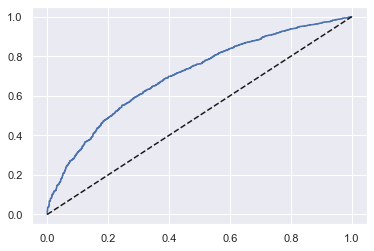

In [41]:
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.ylabel = 'True Positive Rate'
plt.xlabel = 'False Positive Rate'
plt.title = 'ROC Curve'

In [42]:
AUROC = roc_auc_score(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
AUROC

0.7042287060142249

Gini Coefficient

In [43]:
df_actual_predicted_probs = df_actual_predicted_probs.sort_values('y_hat_test_proba')
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba,y_hat_test
19497,1,0.308033,0
8560,1,0.395631,0
17179,0,0.412046,0
39613,0,0.415712,0
4669,1,0.419886,0


In [44]:
df_actual_predicted_probs = df_actual_predicted_probs.reset_index()
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test
0,19497,1,0.308033,0
1,8560,1,0.395631,0
2,17179,0,0.412046,0
3,39613,0,0.415712,0
4,4669,1,0.419886,0


In [45]:
df_actual_predicted_probs['Cumulative N Population'] = df_actual_predicted_probs.index + 1
df_actual_predicted_probs['Cumulative N Good'] = df_actual_predicted_probs['loan_data_targets_test'].cumsum()
df_actual_predicted_probs['Cumulative N Bad'] = df_actual_predicted_probs['Cumulative N Population'] - df_actual_predicted_probs['loan_data_targets_test'].cumsum()
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad
0,19497,1,0.308033,0,1,1,0
1,8560,1,0.395631,0,2,2,0
2,17179,0,0.412046,0,3,2,1
3,39613,0,0.415712,0,4,2,2
4,4669,1,0.419886,0,5,3,2


In [46]:
df_actual_predicted_probs['Cumulative Perc Population'] = df_actual_predicted_probs['Cumulative N Population'] / df_actual_predicted_probs.shape[0]
df_actual_predicted_probs['Cumulative Perc Good'] = df_actual_predicted_probs['Cumulative N Good'] / df_actual_predicted_probs['loan_data_targets_test'].sum()
df_actual_predicted_probs['Cumulative Perc Bad'] = df_actual_predicted_probs['Cumulative N Bad'] / (df_actual_predicted_probs.shape[0] - df_actual_predicted_probs['loan_data_targets_test'].sum())
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
0,19497,1,0.308033,0,1,1,0,0.000126,0.000146,0.000000
1,8560,1,0.395631,0,2,2,0,0.000252,0.000292,0.000000
2,17179,0,0.412046,0,3,2,1,0.000378,0.000292,0.000914
3,39613,0,0.415712,0,4,2,2,0.000504,0.000292,0.001828
4,4669,1,0.419886,0,5,3,2,0.000629,0.000438,0.001828


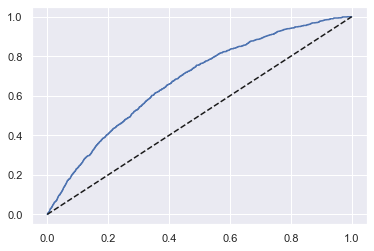

In [47]:
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Bad'])
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Population'], linestyle='--', color='k')
plt.xlabel = 'Cumulative % Population'
plt.ylabel = 'Cumulative % Defaulted'
plt.title = 'Gini Coefficient'

In [48]:
Gini = AUROC * 2 - 1
Gini

0.4084574120284499

Kolmogorov-Smirnov (KS)
If KS = 1, we have classified good borrowers from bad borrowers perfectly.
If KS = 0, equivalent to random classification.

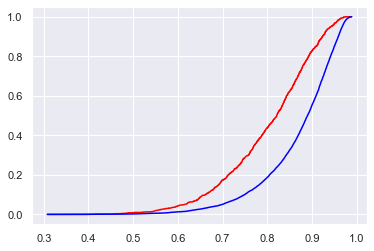

In [49]:
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Bad'], color='red')
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Good'], color='blue')

In [50]:
KS = max(df_actual_predicted_probs['Cumulative Perc Bad'] - df_actual_predicted_probs['Cumulative Perc Good'])
KS

0.30637611924365143

Creating the Scorecard

In [52]:
df_ref_categories = pd.DataFrame(ref_categories, columns=['Features Name'])
df_ref_categories['Coefficients'] = 0
df_ref_categories['p-value'] = np.nan
df_ref_categories

,Features Name,Coefficients,p-value
0,grade: G,0,NaN
1,addr_state: NE_NV_SD,0,NaN
2,purpose: small_business,0,NaN
3,term: 60,0,NaN
4,emp_length: 0,0,NaN
5,mths_since_issue_date: <86,0,NaN
6,annual_inc: <18K,0,NaN
7,installment: >700,0,NaN
8,inq_last_6mths: >4,0,NaN
9,mths_since_last_delinq: <15,0,NaN


In [55]:
df_scorecard = pd.concat([summary_table, df_ref_categories])
df_scorecard = df_scorecard.reset_index()
df_scorecard

,index,Features Name,Coefficients,p-value
0,0,Intercept,-1.405381,NaN
1,1,grade: A,0.867081,9.443713e-05
2,2,grade: B,0.553366,2.095042e-03
3,3,grade: C,0.393043,2.207870e-02
4,4,grade: D,0.141483,3.699575e-01
5,5,grade: E,0.121749,3.992127e-01
6,6,grade: F,0.016886,9.052667e-01
7,7,addr_state: FL_MO,-0.146955,1.199537e-02
8,8,addr_state: MS_ID_NM_HI,-0.039906,8.002520e-01
9,9,addr_state: NH_WA_UT_MD_AK,-0.039666,5.764625e-01


In [59]:
df_scorecard['Original Feature Name'] = df_scorecard['Features Name'].str.split(':').str[0]
df_scorecard.head()

,index,Features Name,Coefficients,p-value,Original Feature Name
0,0,Intercept,-1.405381,NaN,Intercept
1,1,grade: A,0.867081,0.000094,grade
2,2,grade: B,0.553366,0.002095,grade
3,3,grade: C,0.393043,0.022079,grade
4,4,grade: D,0.141483,0.369958,grade


In [60]:
min_score = 300
max_score = 850

In [61]:
df_scorecard.groupby('Original Feature Name')['Coefficients'].min()

Original Feature Name
Intercept                     -1.405381
addr_state                    -0.146955
annual_inc                     0.000000
emp_length                    -0.034140
grade                          0.000000
inq_last_6mths                 0.000000
installment                    0.000000
int_rate                       0.000000
mths_since_earliest_cr_line   -0.170612
mths_since_issue_date         -0.146761
mths_since_last_delinq        -0.113815
purpose                        0.000000
term                           0.000000
Name: Coefficients, dtype: float64

In [62]:
min_sum_coef = df_scorecard.groupby('Original Feature Name')['Coefficients'].min().sum()
min_sum_coef

-2.0176631192608947

In [63]:
max_sum_coef = df_scorecard.groupby('Original Feature Name')['Coefficients'].max().sum()
max_sum_coef

6.051203415973205

In [64]:
df_scorecard['Score - Calculation'] = df_scorecard['Coefficients'] * (max_score - min_score) / (max_sum_coef - min_sum_coef)
df_scorecard

,index,Features Name,Coefficients,p-value,Original Feature Name,Score - Calculation
0,0,Intercept,-1.405381,NaN,Intercept,-95.795319
1,1,grade: A,0.867081,9.443713e-05,grade,59.103070
2,2,grade: B,0.553366,2.095042e-03,grade,37.719226
3,3,grade: C,0.393043,2.207870e-02,grade,26.791080
4,4,grade: D,0.141483,3.699575e-01,grade,9.643963
5,5,grade: E,0.121749,3.992127e-01,grade,8.298828
6,6,grade: F,0.016886,9.052667e-01,grade,1.150976
7,7,addr_state: FL_MO,-0.146955,1.199537e-02,addr_state,-10.016908
8,8,addr_state: MS_ID_NM_HI,-0.039906,8.002520e-01,addr_state,-2.720149
9,9,addr_state: NH_WA_UT_MD_AK,-0.039666,5.764625e-01,addr_state,-2.703730


In [67]:
df_scorecard['Score - Calculation'][0] = ((df_scorecard['Coefficients'][0] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score
df_scorecard.head()

C:\Users\gk514\AppData\Local\Temp/ipykernel_14300/3567356317.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scorecard['Score - Calculation'][0] = ((df_scorecard['Coefficients'][0] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score


,index,Features Name,Coefficients,p-value,Original Feature Name,Score - Calculation
0,0,Intercept,-1.405381,NaN,Intercept,341.735115
1,1,grade: A,0.867081,0.000094,grade,59.103070
2,2,grade: B,0.553366,0.002095,grade,37.719226
3,3,grade: C,0.393043,0.022079,grade,26.791080
4,4,grade: D,0.141483,0.369958,grade,9.643963


In [70]:
df_scorecard['Score - Preliminary'] = df_scorecard['Score - Calculation'].round()
df_scorecard.head()

,index,Features Name,Coefficients,p-value,Original Feature Name,Score - Calculation,Score - Preliminary
0,0,Intercept,-1.405381,NaN,Intercept,341.735115,342.0
1,1,grade: A,0.867081,0.000094,grade,59.103070,59.0
2,2,grade: B,0.553366,0.002095,grade,37.719226,38.0
3,3,grade: C,0.393043,0.022079,grade,26.791080,27.0
4,4,grade: D,0.141483,0.369958,grade,9.643963,10.0


In [71]:
df_scorecard.groupby('Original Feature Name')['Score - Preliminary'].min().sum()

300.0

In [72]:
df_scorecard.groupby('Original Feature Name')['Score - Preliminary'].max().sum()

849.0

In [73]:
df_scorecard['Difference'] = df_scorecard['Score - Preliminary'] - df_scorecard['Score - Calculation']
df_scorecard

,index,Features Name,Coefficients,p-value,Original Feature Name,Score - Calculation,Score - Preliminary,Difference
0,0,Intercept,-1.405381,NaN,Intercept,341.735115,342.0,0.264885
1,1,grade: A,0.867081,9.443713e-05,grade,59.103070,59.0,-0.103070
2,2,grade: B,0.553366,2.095042e-03,grade,37.719226,38.0,0.280774
3,3,grade: C,0.393043,2.207870e-02,grade,26.791080,27.0,0.208920
4,4,grade: D,0.141483,3.699575e-01,grade,9.643963,10.0,0.356037
5,5,grade: E,0.121749,3.992127e-01,grade,8.298828,8.0,-0.298828
6,6,grade: F,0.016886,9.052667e-01,grade,1.150976,1.0,-0.150976
7,7,addr_state: FL_MO,-0.146955,1.199537e-02,addr_state,-10.016908,-10.0,0.016908
8,8,addr_state: MS_ID_NM_HI,-0.039906,8.002520e-01,addr_state,-2.720149,-3.0,-0.279851
9,9,addr_state: NH_WA_UT_MD_AK,-0.039666,5.764625e-01,addr_state,-2.703730,-3.0,-0.296270


In [74]:
df_scorecard['Score - Final'] = df_scorecard['Score - Preliminary']
df_scorecard['Score - Final'][40] = 17
df_scorecard.head()

C:\Users\gk514\AppData\Local\Temp/ipykernel_14300/831424282.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scorecard['Score - Final'][40] = 17


,index,Features Name,Coefficients,p-value,Original Feature Name,Score - Calculation,Score - Preliminary,Difference,Score - Final
0,0,Intercept,-1.405381,NaN,Intercept,341.735115,342.0,0.264885,342.0
1,1,grade: A,0.867081,0.000094,grade,59.103070,59.0,-0.103070,59.0
2,2,grade: B,0.553366,0.002095,grade,37.719226,38.0,0.280774,38.0
3,3,grade: C,0.393043,0.022079,grade,26.791080,27.0,0.208920,27.0
4,4,grade: D,0.141483,0.369958,grade,9.643963,10.0,0.356037,10.0


In [77]:
max_sum_score = df_scorecard.groupby('Original Feature Name')['Score - Final'].max().sum()
max_sum_score

850.0

In [78]:
min_sum_score = df_scorecard.groupby('Original Feature Name')['Score - Final'].min().sum()
min_sum_score

300.0